<a href="https://colab.research.google.com/github/Satyake/LSTM-Time-serries-prediction/blob/master/Time_Series_Analysis_Pieran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
df=pd.read_csv('/content/macrodata.csv',index_col=0,parse_dates=True)

FileNotFoundError: ignored

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


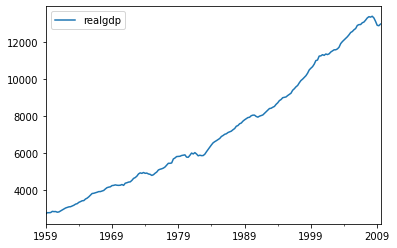

In [ ]:
df[['realgdp']].plot()

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
#hodrick prescott filter
cycle,trend=hpfilter(df[['realgdp']],lamb=1600)

In [ ]:
cycle.head()

,realgdp
1959-03-31,39.511915
1959-06-30,80.088532
1959-09-30,48.875455
1959-12-31,30.591933
1960-03-31,64.882667


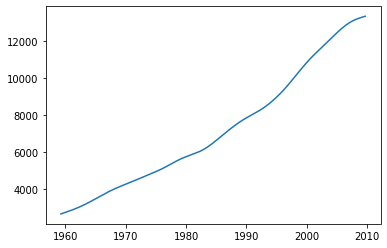

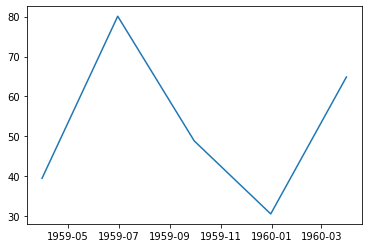

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(trend)
plt.figure(2)
plt.plot(cycle['1959-03-31':'1960-03-31'])

In [ ]:
airline=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(airline['Thousands of Passengers'],model='additive')

In [ ]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

<Figure size 720x720 with 0 Axes>

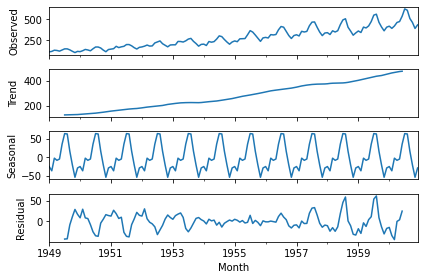

In [ ]:
plt.figure(figsize=(10,10))
result.plot();

In [ ]:
#Exponential MWA

MW=airline['Thousands of Passengers'].rolling(window=2).mean()
MW1=airline['Thousands of Passengers'].rolling(window=12).mean()
MW2=airline['Thousands of Passengers'].rolling(window=30).mean()

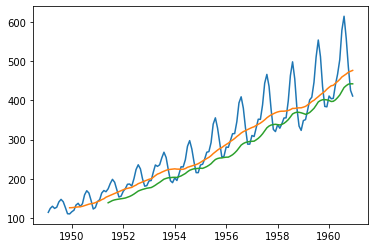

In [ ]:
plt.plot(MW)
plt.plot(MW1)
plt.plot(MW2)

In [ ]:
EWM=airline['Thousands of Passengers'].ewm(span=12).mean()

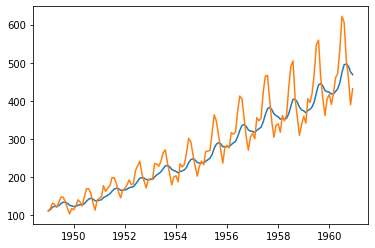

In [ ]:
plt.plot(EWM)
plt.plot(airline)

In [ ]:
#Holt-Winters methods
airline.index
airline.index.freq='MS'

In [ ]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span=12
alpha=2/(span+1)

In [ ]:
EMW=airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

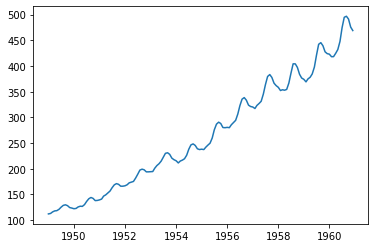

In [ ]:
plt.plot(EMW)

In [ ]:
model=SimpleExpSmoothing(airline['Thousands of Passengers'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
Fitted_model=model.fit(smoothing_level=alpha)

In [ ]:
SESM=Fitted_model.forecast(32)

In [ ]:
EMA=airline['Thousands of Passengers'].ewm(alpha=alpha).mean()

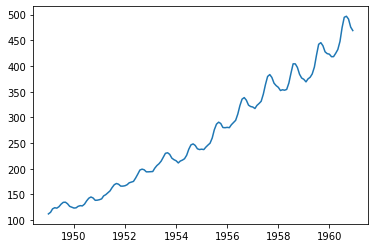

In [ ]:
plt.plot(EMA)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
DoubleEXPSmoothing=ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


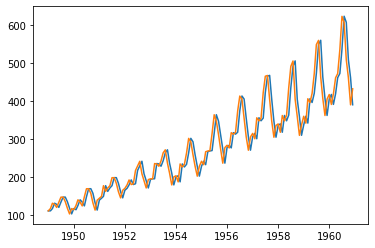

In [ ]:
plt.plot(DoubleEXPSmoothing)
plt.plot(airline['Thousands of Passengers'])

In [ ]:
DoubleEXP1=ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
DoubleEXP1.head()

Month
1949-01-01    111.583236
1949-02-01    118.839294
1949-03-01    133.327416
1949-04-01    127.915388
1949-05-01    120.978320
dtype: float64

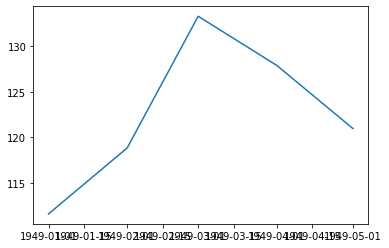

In [ ]:
plt.plot(DoubleEXP1['1949-01-01':'1949-05-01'])


In [ ]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
train=airline.iloc[:109]
test=airline.iloc[109:]

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-09-01,404
1957-10-01,347
1957-11-01,305


In [ ]:
len(test)

35

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing

In [ ]:
SEXP=SimpleExpSmoothing(train['Thousands of Passengers'])
fitted_SEXP=SEXP.fit()
test_SEXP=fitted_SEXP.fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


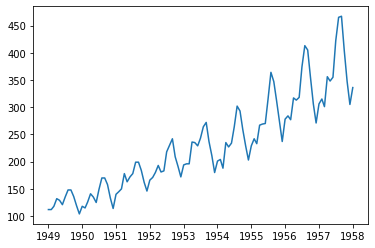

In [ ]:
plt.plot(test_SEXP)

In [ ]:
Exp=ExponentialSmoothing(train['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fitted_model=Exp.fit()

In [ ]:
test_pred=fitted_model.forecast(35)

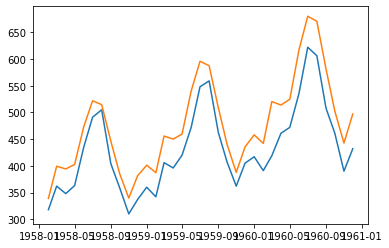

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test['Thousands of Passengers'])
plt.plot(test_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_squared_error(test_pred,test['Thousands of Passengers'])


2429.4623156650587

In [ ]:
mean_squared_error(test_SEXP,test['Thousands of Passengers'])

14349.142857142857

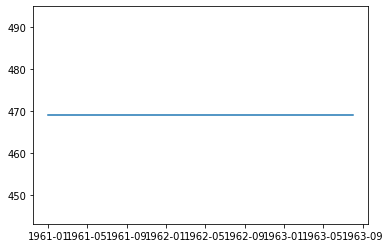

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(test['Thousands of Passengers'])
plt.plot(SESM)

In [ ]:
from statsmodels.tsa.statespace.tools import diff #converting a stationary data to nonstationary

In [ ]:
data=airline['Thousands of Passengers']

In [ ]:
z=diff(data,k_diff=1)

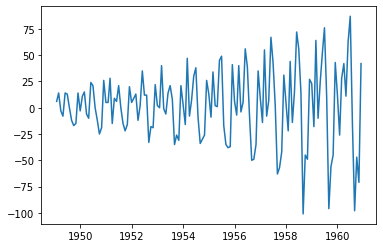

In [ ]:
plt.plot(z)

In [ ]:
stationary_data=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
non_stationary_data=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [ ]:
df=pd.DataFrame([10,11,15,19,21])

In [ ]:
acf=acf(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
acf

array([ 1.        ,  0.4737069 , -0.17327586, -0.47543103, -0.325     ])

In [ ]:
pacf=pacf_yw(df,nlags=4,method='unbiased')

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [ ]:
pacf

array([  1.        ,   0.59213362,  -0.98465847, -13.46058631,
         1.04620432])

In [ ]:
pacf_ols(df,nlags=4,unbiased=True)

array([ 1.        ,  1.26847291, -1.11111111,  3.87179487,  1.29950495])

In [ ]:

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot

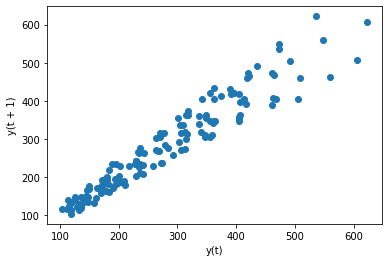

In [ ]:
lag_plot(stationary_data['Thousands of Passengers'])#autocorrelation of nonstationary data

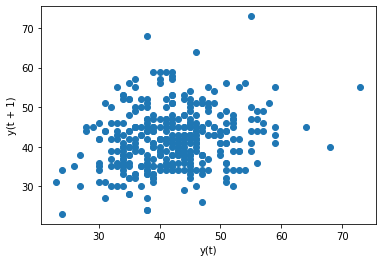

In [ ]:
lag_plot(non_stationary_data['Births'])#autocorrelation of stationary data 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

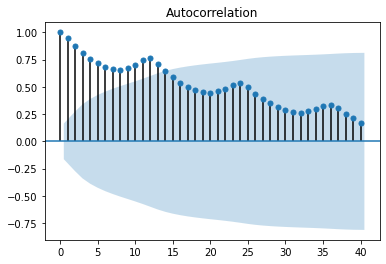

In [ ]:
plot_acf(stationary_data['Thousands of Passengers'],lags=40);

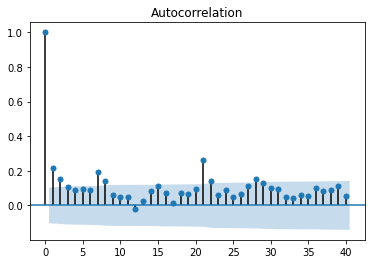

In [ ]:
plot_acf(non_stationary_data['Births'],lags=40);

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


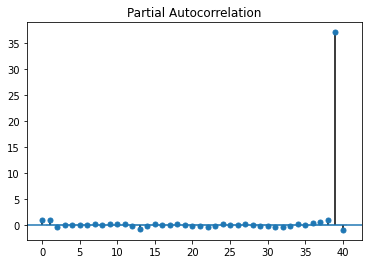

In [ ]:
plot_pacf(stationary_data['Thousands of Passengers'],lags=40);

In [ ]:
#autoregression
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AR,ARResults

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uspopulation=pd.read_csv('/content/uspopulation.csv',index_col='DATE',parse_dates=True)

In [ ]:
uspopulation.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


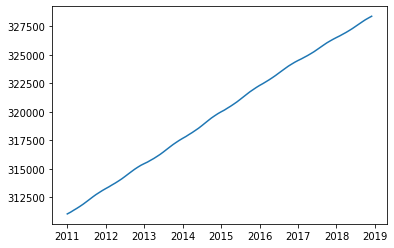

In [ ]:
plt.plot(uspopulation['PopEst'])

In [ ]:
poputrain=uspopulation.iloc[:65]
poputest=uspopulation.iloc[65:]

In [ ]:
model=AR(poputrain['PopEst'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
AR1FIT=model.fit(maxlag=1)

In [ ]:
AR1FIT.params

const       -63.454589
L1.PopEst     1.000790
dtype: float64

In [ ]:
len(poputrain)

65

In [ ]:
start=len(poputrain)
end=len(poputrain)+len(poputest)+12

TypeError: ignored

In [ ]:
AR1FIT.predict(start=start,end=end)

2016-06-01    323185.665475
2016-07-01    323377.482339
2016-08-01    323569.450711
2016-09-01    323761.570711
2016-10-01    323953.842460
2016-11-01    324146.266076
2016-12-01    324338.841680
2017-01-01    324531.569392
2017-02-01    324724.449331
2017-03-01    324917.481619
2017-04-01    325110.666375
2017-05-01    325304.003720
2017-06-01    325497.493775
2017-07-01    325691.136660
2017-08-01    325884.932495
2017-09-01    326078.881402
2017-10-01    326272.983502
2017-11-01    326467.238915
2017-12-01    326661.647762
2018-01-01    326856.210166
2018-02-01    327050.926246
2018-03-01    327245.796125
2018-04-01    327440.819924
2018-05-01    327635.997765
2018-06-01    327831.329768
2018-07-01    328026.816057
2018-08-01    328222.456752
2018-09-01    328418.251976
2018-10-01    328614.201851
2018-11-01    328810.306499
2018-12-01    329006.566042
Freq: MS, dtype: float64

In [ ]:
predictions1=AR1FIT.predict(start=start,end=end)

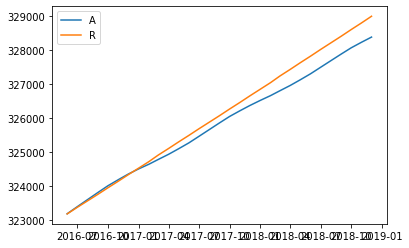

In [ ]:
plt.plot(poputest)
plt.legend('Actual')
plt.plot(predictions1)
plt.legend('AR(1)')


In [ ]:
AR2FIT=model.fit(maxlag=2)

In [ ]:
pred2=AR2FIT.predict(start=start,end=end)
pred2.rename('AR(2)')

2016-06-01    323176.777887
2016-07-01    323359.328307
2016-08-01    323541.646792
2016-09-01    323723.729623
2016-10-01    323905.573713
2016-11-01    324087.176511
2016-12-01    324268.535915
2017-01-01    324449.650207
2017-02-01    324630.517990
2017-03-01    324811.138139
2017-04-01    324991.509759
2017-05-01    325171.632150
2017-06-01    325351.504775
2017-07-01    325531.127237
2017-08-01    325710.499254
2017-09-01    325889.620644
2017-10-01    326068.491309
2017-11-01    326247.111220
2017-12-01    326425.480408
2018-01-01    326603.598954
2018-02-01    326781.466981
2018-03-01    326959.084648
2018-04-01    327136.452145
2018-05-01    327313.569685
2018-06-01    327490.437503
2018-07-01    327667.055855
2018-08-01    327843.425007
2018-09-01    328019.545242
2018-10-01    328195.416850
2018-11-01    328371.040134
2018-12-01    328546.415400
Freq: MS, Name: AR(2), dtype: float64

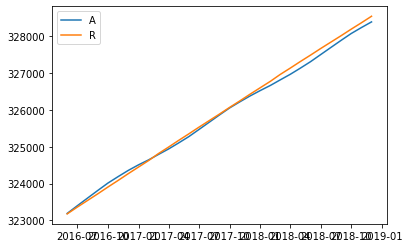

In [ ]:
plt.plot(poputest)
plt.legend('Actual')
plt.plot(pred2)
plt.legend('AR(1)')

In [ ]:
ARXFIT=model.fit(ic='t-stat')

In [ ]:
predx=ARXFIT.predict(start=start,end=end)

In [ ]:
ARXFIT.params

const       -76.135126
L1.PopEst     2.234214
L2.PopEst    -1.924550
L3.PopEst     1.139828
L4.PopEst    -0.968603
L5.PopEst     0.519664
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
forecasted_future=AR2FIT.predict(start=start,end=end)

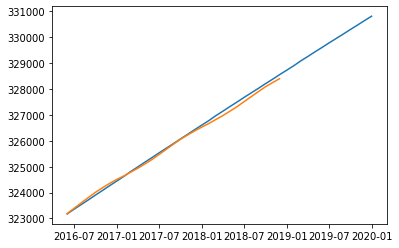

In [ ]:
plt.plot(forecasted_future)
plt.plot(poputest)